<a href="https://colab.research.google.com/github/epic-coder97/Data-602/blob/main/Data_602_Week_6_Nikita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework | Week 6
*Nikita Dharmadhikari*

## SVM


---

- Load ‘load_breast_cancer’ dataset from sklearn.datasets.
- Print the names of the features.
- Print the names of the labels.
- Print the shape of the data.
- Check the top 5 records of the feature set.
- Print the cancer labels for the target set.
- Split the data (70% training).
- Create an svm classifier.
- Train the model using the training dataset.
- Predict the response for test dataset.
- Evaluate the model with the ‘metrics’ class specifying the ‘precision’ and
‘recall’ metrics.
- What does the recall metric imply?


---



---



In [61]:
# importing Libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
# loading datasets
from sklearn.datasets import load_breast_cancer
### spliting dataset into training and testing part
from sklearn.model_selection import train_test_split

In [63]:
### storing dataset in data variable
data = load_breast_cancer()
### separating dataset into dependent and independent features
X = data.data
y = data.target

In [64]:
data


{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [65]:
df_cancer = pd.DataFrame(np.c_[data['data'], data['target']], columns = np.append(data['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [66]:
#getting feature names
features  =  data.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [67]:
#getting shape of data
df_cancer.shape


(569, 31)

#### What is a Support Vector Machine (SVM)?
A Support Vector Machine (SVM) is a binary linear classification whose decision boundary is explicitly constructed to minimize generalization error. It is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection.

SVM is well suited for classification of complex but small or medium sized datasets.

In [68]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

Let's split our data using 70% for training and the remaining 30% for testing.



In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)


In [70]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (398, 30)


The size of our testing "X" (input features) is (171, 30)


The size of our training "y" (output feature) is (398,)


The size of our testing "y" (output features) is (171,)


## Import Support Vector Machine (SVM) Model


In [89]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')

### Now, let's train our SVM model with our "training" dataset.


In [90]:
svc_model.fit(X_train, y_train)


SVC(kernel='linear')

### Let's use our trained model to make a prediction using our testing data


In [92]:
y_predict = svc_model.predict(X_test)



In [74]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [75]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,104,3
is_healthy,10,54


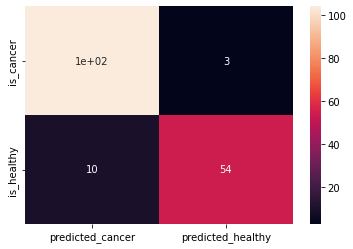

In [76]:
sns.heatmap(confusion, annot=True)


In [77]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        64
         1.0       0.91      0.97      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [93]:
print("Precision:",metrics.precision_score(y_test, y_predict))

print("Recall:",metrics.recall_score(y_test, y_predict))

Precision: 0.9626168224299065
Recall: 0.9626168224299065


The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0. recall is the fraction of information retrieved.

## Logistic Regression
- Use the same dataset for a Logistic Regression (CV) model.
- Use the same process as for the SVM.
- Generate the classification report.
- Generate the confusion matrix.
- Generate the area under the curve.

In [78]:
from sklearn.linear_model import LogisticRegression


In [79]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)    


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [80]:
y_pred_class=logreg.predict(X_test) # make predictions based on x_test and store it to y_pred_class


In [81]:
# Now let us see how our model is performing. 
# We will start with accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.9415204678362573


Not bad at all. 94.1% of the time our model was able to identify breast cancer based on the training data 
 Now let us see how our "intelligent" model compare to a dumb model which predicts "o" or "not cancer" all the time
because it the most prevelent class

In [82]:
y_test.value_counts() # as you see "0" is more prevalent 


1.0    107
0.0     64
Name: target, dtype: int64

In [83]:
# Now let us see the percentage of "o" in y_test. This will be the accuracy of a dumb model that predicts 0 
# all the time
1-y_test.mean()

0.3742690058479532

In [84]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 54,  10],
       [  3, 104]])

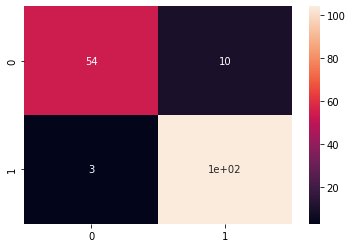

In [85]:
sns.heatmap(cm ,annot=True)


In [86]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        64
         1.0       0.91      0.97      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



The accuracy we recieved is 94%

### Importing required libraries

In [87]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

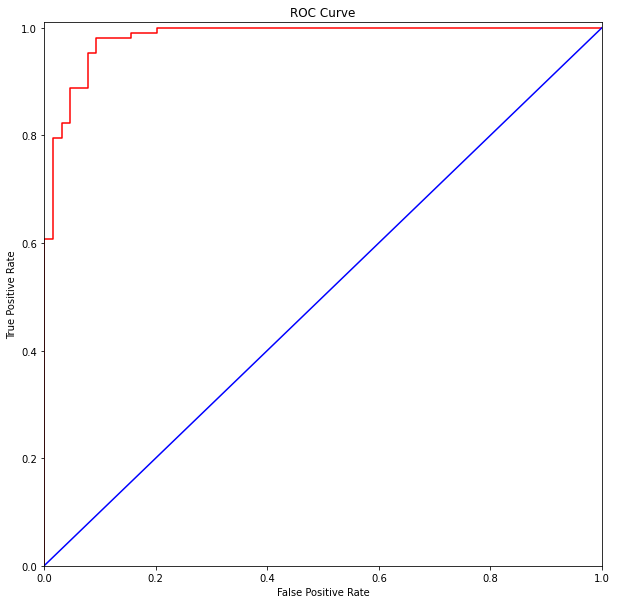

In [88]:
y=data.target_names
score_y =logreg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test,score_y)

auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0,1],[0, 1], color= 'blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()